<a href="https://colab.research.google.com/github/CristianRiquelmeF/Ciencia-de-datos/blob/main/Trabajo2/Modelos_de_clasificaci%C3%B3n_aplicados_en_CASEN_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Carga de librerías y base de datos**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from pylab import rcParams

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import recall_score , classification_report , confusion_matrix  ,roc_curve , roc_auc_score , accuracy_score
from sklearn.metrics import precision_recall_curve , auc ,f1_score , plot_confusion_matrix , precision_score , recall_score


from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek


from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


+ **Presentación y objetivos**
A continuación se realizará un análisis exploratorio aplicado a la "La Encuesta de Caracterización Socioeconómica Nacional" (CASEN) del año 2017.  Las variables seleccionadas para la evaluación serán:
1. Sexo [sexo]
2. Edad [edad]
3. Estado civil [ecivil]
4. Escolaridad [esc]
5. Nivel educacional [educ]
6. Dependencia administrativa [depen]
7. Condición de actividad [activ]
8. Indicador de materialidad [indmat]
9. Indicador de Saneamiento[indsan]
10. Calidad global de la vivienda [calglobviv]
11. Hacinamiento [hacinamiento]
12. Sistema de salud previsional [s12]
13. Tipo de contrato [o16]
14. Empleado[o1]
15. Ocupación u Oficio[oficio1]
16. Ingreso Total[ytot]

La variable dependiente será: pobreza.

Luego, se procederá a aplicar tres modelos de clasificación supervisada diferentes en Machine Learning: Regresión logística, Naive Bayes y Decision Tree Classifier. Para evaluar el rendimiento de cada modelo, se utilizará una matriz de confusión que mostrará los resultados de los indicadores: precision, recall y f1-score; además, se tendrá en cuenta la validación cruzada.

## **Exploración preliminar de la base de datos** ##

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/BBDD/CASEN_2017_select.csv", encoding="latin-1", sep=",")
data.head()

,folio,sexo,edad,ecivil,o1,oficio1,o16,s12,ytot,pobreza,esc,educ,depen,activ,indmat,indsan,calglobviv,hacinamiento
0,110110020201,Mujer,56,Soltero(a),Sí,Trabajadores no calificado,NaN,No sabe,250000.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"
1,110110020301,Mujer,21,Soltero(a),Sí,Trabajadores no calificado,Plazo fijo,Ninguno (Particular),211091.0,No pobres,7.0,Básica Incom.,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
2,110110020401,Hombre,24,Conviviente o pareja sin acuerdo de unión civil,Sí,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,281750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
3,110110020401,Hombre,28,Conviviente o pareja sin acuerdo de unión civil,Sí,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,311750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
4,110110020501,Hombre,26,Casado(a),No,Trabajadores no calificado,Plazo indefinido,Sistema Público FONASA Grupo B,341667.0,No pobres,15.0,Técnico Nivel Superior Completo,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"


In [ ]:
data.shape

(216439, 18)

In [ ]:
#Registrando conteo inicial de la variable objetivo antes de procesar la data.
data['pobreza'].value_counts()

No pobres             195357
Pobres no extremos     15260
Pobres extremos         5614
Name: pobreza, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216439 entries, 0 to 216438
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   folio         216439 non-null  int64  
 1   sexo          216439 non-null  object 
 2   edad          216439 non-null  int64  
 3   ecivil        216439 non-null  object 
 4   o1            175076 non-null  object 
 5   oficio1       92417 non-null   object 
 6   o16           68630 non-null   object 
 7   s12           216439 non-null  object 
 8   ytot          144706 non-null  float64
 9   pobreza       216231 non-null  object 
 10  esc           174058 non-null  float64
 11  educ          216439 non-null  object 
 12  depen         58122 non-null   object 
 13  activ         175076 non-null  object 
 14  indmat        216439 non-null  object 
 15  indsan        216439 non-null  object 
 16  calglobviv    216439 non-null  object 
 17  hacinamiento  216439 non-null  object 
dtypes: f

In [ ]:
data.nunique().sort_values()

sexo                2
o1                  2
o16                 3
pobreza             3
activ               3
indsan              3
calglobviv          4
indmat              4
hacinamiento        5
ecivil              8
s12                10
oficio1            11
depen              12
educ               14
esc                23
edad              108
ytot            27028
folio           70948
dtype: int64

In [ ]:
data['esc'].nunique()

23

In [ ]:
data.describe()

,folio,edad,ytot,esc
count,2.164390e+05,216439.000000,1.447060e+05,174058.000000
mean,8.704111e+11,37.780257,4.039880e+05,10.825771
std,3.926348e+11,22.950752,7.838145e+05,4.293652
min,1.101100e+11,0.000000,8.300000e+01,0.000000
25%,5.804101e+11,19.000000,1.083300e+05,8.000000
50%,8.401102e+11,36.000000,2.700000e+05,12.000000
75%,1.310910e+12,56.000000,4.500000e+05,14.000000
max,1.520130e+12,117.000000,8.470000e+07,22.000000


In [ ]:
#Analizo los datos duplicados.
data.duplicated().sum()

385

In [ ]:
#Borro los duplicados. Al ser un total de 216439 filas, borrar 385 filas duplicadas no afectan en general pero permite limpiar de la data información innecesaria.
data = data.drop_duplicates()
print(data.duplicated().sum())
print(data.shape)

0
(216054, 18)


In [ ]:
#Revisión de valores nulos.
print(data.isnull().sum().sort_values(ascending = False))
na_por = ((data.isnull().sum() / len(data))*100).sort_values(ascending = False)
print('##################################')
print('Valores porcentuales de nulos')
print(na_por)


depen           158227
o16             147438
oficio1         123655
ytot             71465
esc              42099
o1               41081
activ            41081
pobreza            208
calglobviv           0
indsan               0
indmat               0
folio                0
educ                 0
sexo                 0
s12                  0
ecivil               0
edad                 0
hacinamiento         0
dtype: int64
##################################
Valores porcentuales de nulos
depen           73.234932
o16             68.241273
oficio1         57.233377
ytot            33.077379
esc             19.485406
o1              19.014228
activ           19.014228
pobreza          0.096272
calglobviv       0.000000
indsan           0.000000
indmat           0.000000
folio            0.000000
educ             0.000000
sexo             0.000000
s12              0.000000
ecivil           0.000000
edad             0.000000
hacinamiento     0.000000
dtype: float64


+ Se trabajará con la variable dependiente pobreza para generar un modelo de clasificación, por lo tanto, será ésta la que focalice el trabajo exploratorio para luego implementar modelos y estrategias de machine learning.

Borrando los valores nulos de la variable 'pobreza', al ser sólo 208 (0.09%) de un total de 216054 no se producirá gran impacto al borrarlos.

In [ ]:
data = data.dropna(subset=["pobreza"])
print(data['pobreza'].isnull().sum())
print(data['pobreza'].value_counts())

0
No pobres             195029
Pobres no extremos     15216
Pobres extremos         5601
Name: pobreza, dtype: int64


+ Analizando variable edad

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


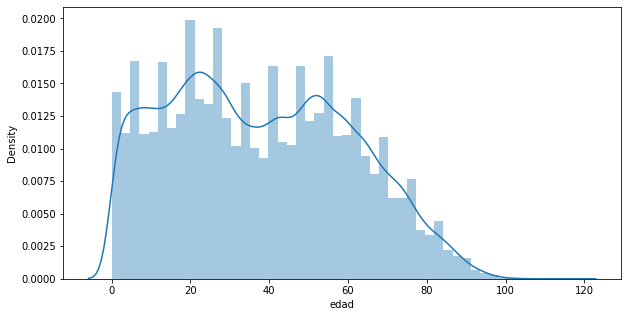

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data['edad'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribución Edad')

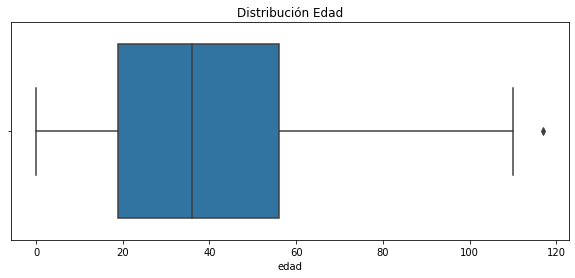

In [ ]:
#Revisión outliers
fig=plt.figure(figsize=(10,4))
ax=sns.boxplot(data['edad'])
ax.set_title('Distribución Edad')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribución Edad')

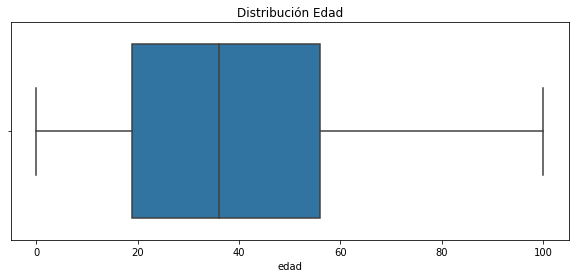

In [ ]:
#Borrando dato extremo
data.loc[data['edad']>100,'edad']=data[data['edad']<100]['edad'].max()
fig=plt.figure(figsize=(10,4))
ax=sns.boxplot(data['edad'])
ax.set_title('Distribución Edad')

+ Realizo una revisión con un nuevo dataframe filtrado por la edad de los menores de 18 años.Esto para ver la variación en los porcentajes de valores nulos.

In [ ]:
filtro =data['edad'] < 18
data_menores = data[filtro]
data_menores.head()

,folio,sexo,edad,ecivil,o1,oficio1,o16,s12,ytot,pobreza,esc,educ,depen,activ,indmat,indsan,calglobviv,hacinamiento
6,110110020501,Mujer,1,Soltero(a),NaN,NaN,NaN,Sistema Público FONASA Grupo B,NaN,No pobres,NaN,Sin Educ. Formal,NaN,NaN,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"
12,110110020901,Hombre,1,Soltero(a),NaN,NaN,NaN,Sistema Público FONASA Grupo A,NaN,No pobres,NaN,Sin Educ. Formal,Particular Subvencionado,NaN,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
23,110110040101,Mujer,16,Soltero(a),No,NaN,NaN,FF.AA. y de Orden,NaN,No pobres,11.0,M. Hum. Incompleta,Particular Subvencionado,Inactivos,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
24,110110040101,Mujer,10,Soltero(a),NaN,NaN,NaN,Sistema Público FONASA Grupo C,18675.0,No pobres,NaN,Básica Incom.,Particular Subvencionado,NaN,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
25,110110040101,Mujer,3,Soltero(a),NaN,NaN,NaN,Sistema Público FONASA Grupo C,NaN,No pobres,NaN,Sin Educ. Formal,Junji,NaN,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"


In [ ]:
data_menores.shape

(49974, 18)

In [ ]:
#Revisión de valores nulos en base de sólo menores de edad.
print(data_menores.isnull().sum().sort_values(ascending = False))
menores_por = (data_menores.isnull().sum() / len((data_menores))*100).sort_values(ascending = False)
print('##################################')
print('Valores porcentuales de nulos')
print(menores_por)

o16             49809
oficio1         49760
esc             41085
o1              41077
activ           41077
ytot            35985
depen            7907
folio               0
calglobviv          0
indsan              0
indmat              0
pobreza             0
educ                0
sexo                0
s12                 0
ecivil              0
edad                0
hacinamiento        0
dtype: int64
##################################
Valores porcentuales de nulos
o16             99.669828
oficio1         99.571777
esc             82.212751
o1              82.196742
activ           82.196742
ytot            72.007444
depen           15.822228
folio            0.000000
calglobviv       0.000000
indsan           0.000000
indmat           0.000000
pobreza          0.000000
educ             0.000000
sexo             0.000000
s12              0.000000
ecivil           0.000000
edad             0.000000
hacinamiento     0.000000
dtype: float64


+ Al analizar los datos nulos, tomo la decisión de eliminar de la base los menores de 18 años. Esta decisión es tomada en base a las características de la encuesta, ya que es aplicada por hogar y se incluyen los presentes en el momento creando más de un registro, lo cual se puede verificar por el número de folio(identificador de hogar). Con esto, los menores de edad introducidos a la base significan desbalance importante en las varible como: 'ingreso total', 'años de escolaridad', 'condición de actividad', 'empleado','oficio'. Además, por lógica de dependencia de los adultos del hogar, los menores generan redundancia en las varibles referidas a las condiciones de hogar, hacinamiento, indicador de materialidad o saneamiento. De estas últimas, se crean duplicados, y considerando que se analizan las condiciones del hogar en sí, no es conveniente considerarlas dos o tres veces dentro de un mismo núcleo. Por lo tanto, realizaré un filtro en la variable edad con valores iguales y mayores a 18 años, y volveré a revisar los valores nulos y el cómo tratarlos, ya que hay variables que no pueden ser eliminadas o imputadas para realizar un buen modelo de analisís de la variable 'pobreza'.

In [ ]:
#filtrando la data
filtro =data['edad'] >=18
data_2 = data[filtro]
data_2.head()

,folio,sexo,edad,ecivil,o1,oficio1,o16,s12,ytot,pobreza,esc,educ,depen,activ,indmat,indsan,calglobviv,hacinamiento
0,110110020201,Mujer,56,Soltero(a),Sí,Trabajadores no calificado,NaN,No sabe,250000.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"
1,110110020301,Mujer,21,Soltero(a),Sí,Trabajadores no calificado,Plazo fijo,Ninguno (Particular),211091.0,No pobres,7.0,Básica Incom.,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
2,110110020401,Hombre,24,Conviviente o pareja sin acuerdo de unión civil,Sí,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,281750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
3,110110020401,Hombre,28,Conviviente o pareja sin acuerdo de unión civil,Sí,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,311750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
4,110110020501,Hombre,26,Casado(a),No,Trabajadores no calificado,Plazo indefinido,Sistema Público FONASA Grupo B,341667.0,No pobres,15.0,Técnico Nivel Superior Completo,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"


In [ ]:
data_2.shape

(165872, 18)

In [ ]:
data_2.describe()

,folio,edad,ytot,esc
count,1.658720e+05,165872.000000,1.304040e+05,164875.000000
mean,8.729825e+11,46.575233,4.448927e+05,10.876694
std,3.888274e+11,18.593226,8.144375e+05,4.388192
min,1.101100e+11,18.000000,8.300000e+01,0.000000
25%,5.804300e+11,30.000000,1.378030e+05,8.000000
50%,8.401102e+11,46.000000,2.900000e+05,12.000000
75%,1.310810e+12,60.000000,5.000000e+05,14.000000
max,1.520130e+12,100.000000,8.470000e+07,22.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


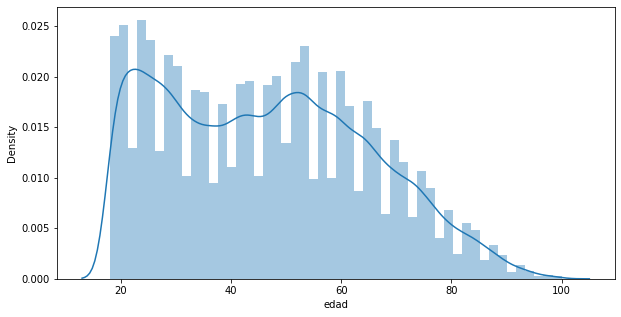

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data_2['edad'])

In [ ]:
#Revisión de valores nulos.
print(data_2.isnull().sum().sort_values(ascending = False))
na_por = ((data_2.isnull().sum() / len(data))*100).sort_values(ascending = False)
print('##################################')
print('Valores porcentuales de nulos')
print(na_por)

depen           150121
o16              97623
oficio1          73889
ytot             35468
esc                997
folio                0
educ                 0
calglobviv           0
indsan               0
indmat               0
activ                0
pobreza              0
sexo                 0
s12                  0
o1                   0
ecivil               0
edad                 0
hacinamiento         0
dtype: int64
##################################
Valores porcentuales de nulos
depen           69.550050
o16             45.228079
oficio1         34.232277
ytot            16.432086
esc              0.461903
folio            0.000000
educ             0.000000
calglobviv       0.000000
indsan           0.000000
indmat           0.000000
activ            0.000000
pobreza          0.000000
sexo             0.000000
s12              0.000000
o1               0.000000
ecivil           0.000000
edad             0.000000
hacinamiento     0.000000
dtype: float64


Efectivamente hay cambios en los porcentajes de valores nulos:
+ Dependencia administrativa [depen] paso de 73% a 69%, por lo tanto borro la columna.
+ Tipo de contrato [o16] pasó de 68% a 45%, por lo tanto borro la columna.
+ Ocupación u Oficio [oficio1] pasó de 57% a 34%, por lo tanto borro la columna.
+ Ingreso Total [ytot] pasó de 33% a 16%, valor óptimo para imputar por la mediana.
+ Escolaridad [esc] pasó de 19% a 0,4% y al ser pocos simplemente los imputaré por la mediana.
+ Empleado [o1] pasó de 19% a 0%.
+ Condición de actividad [activ] pasó de 19% a 0%.

Este sería mi criterio para tratar los valores nulos de la base de datos.

+ Además, se eliminará la varibale categórica que indica el tipo de educación y sólo se contará con la variable de los años. La variable "estado civil", también se retirará, esto se considera luego de revisar el informe "Situación de pobreza; síntesis de resultados" del Ministerio de Desarrollo del año 2018, donde no se considera esta variable en su análisis, y así, reducir en parte la data de trabajo pero no eliminándola de la data principal(al igual que todo lo modificado hasta ahora).
+ A la variable objetivo 'pobreza' la agruparé entre pobres y no pobres, pasandola de tres a dos dimensiones.  

In [ ]:
print(data_2["ytot"].median())
print(data_2["edad"].median())

290000.0
46.0


In [ ]:
#Elimino las variables con altos porcentajes de nulos y reemplazo por la mediana la variable años de escolaridad e ingresos.
data_2.drop('depen', axis=1, inplace=True)
data_2.drop('o16', axis=1, inplace=True)
data_2.drop('oficio1', axis=1, inplace=True)
data_2.drop('educ', axis=1, inplace=True)
data_2.drop('ecivil', axis=1, inplace=True)
data_2["esc"].fillna(data_2["esc"].median(skipna=True), inplace=True)
data_2["ytot"].fillna(data_2["ytot"].median(skipna=True), inplace=True)
data_2['cat_pobreza'] = np.where((data_2["pobreza"])== 'No pobres', 0, 1)
data_2.drop('pobreza', axis=1, inplace=True)
data_2.drop('folio', axis=1, inplace=True)
print(data_2.isnull().sum().sort_values(ascending = False))



sexo            0
edad            0
o1              0
s12             0
ytot            0
esc             0
activ           0
indmat          0
indsan          0
calglobviv      0
hacinamiento    0
cat_pobreza     0
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/l

In [ ]:
print(data_2['cat_pobreza'].value_counts())

0    152653
1     13219
Name: cat_pobreza, dtype: int64


In [ ]:
data_2.head(3)

,sexo,edad,o1,s12,ytot,esc,activ,indmat,indsan,calglobviv,hacinamiento,cat_pobreza
0,Mujer,56,Sí,No sabe,250000.0,12.0,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)",0
1,Mujer,21,Sí,Ninguno (Particular),211091.0,7.0,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)",0
2,Hombre,24,Sí,No sabe,281750.0,12.0,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)",0


**Copia de base de dato**

In [ ]:
data_3 = data_2

In [ ]:
data_3.shape

(165872, 12)

In [ ]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165872 entries, 0 to 216438
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   sexo          165872 non-null  object 
 1   edad          165872 non-null  int64  
 2   o1            165872 non-null  object 
 3   s12           165872 non-null  object 
 4   ytot          165872 non-null  float64
 5   esc           165872 non-null  float64
 6   activ         165872 non-null  object 
 7   indmat        165872 non-null  object 
 8   indsan        165872 non-null  object 
 9   calglobviv    165872 non-null  object 
 10  hacinamiento  165872 non-null  object 
 11  cat_pobreza   165872 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 16.5+ MB


In [ ]:
#Observo el número de categorías de las variables, sin considerar las numéricas (escolaridad, salario, edad).
data_3.nunique().sort_values()

sexo                2
o1                  2
cat_pobreza         2
activ               3
indsan              3
indmat              4
calglobviv          4
hacinamiento        5
s12                10
esc                23
edad               83
ytot            26805
dtype: int64

## **Análisis exploratorio univariado y bivariado** ##

In [ ]:
def bar_plot(variable):

    var = data_3[variable]

    varValue = var.value_counts()

    plt.figure(figsize = (8,5))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.xticks(rotation=45)
    plt.show()

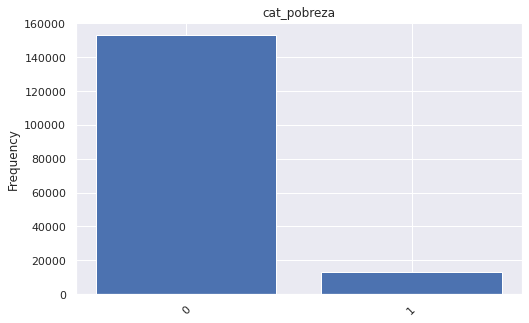

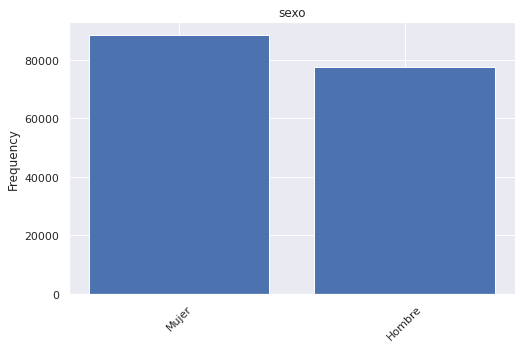

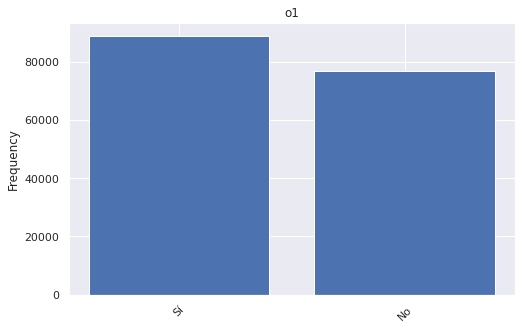

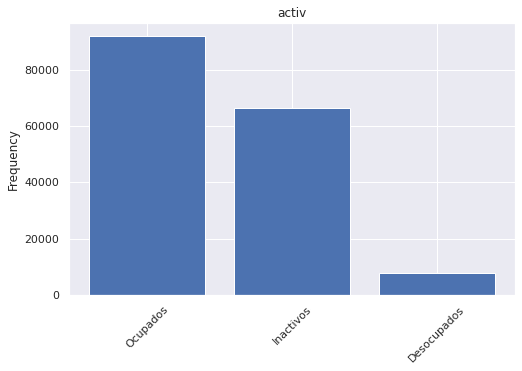

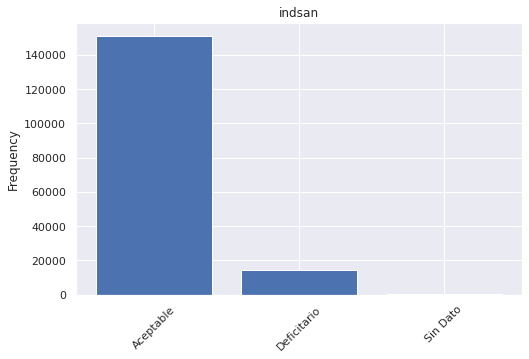

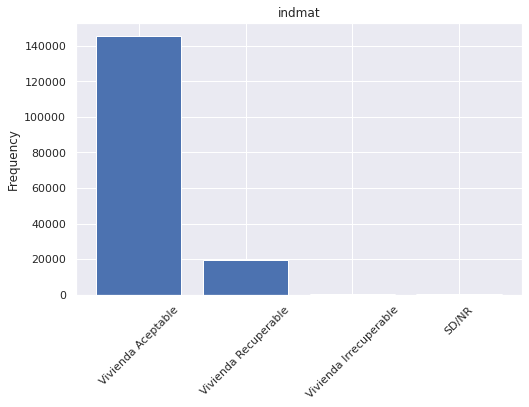

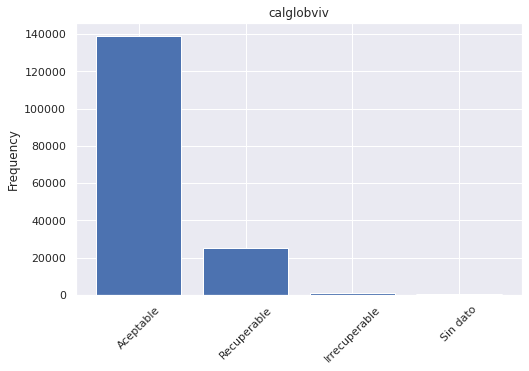

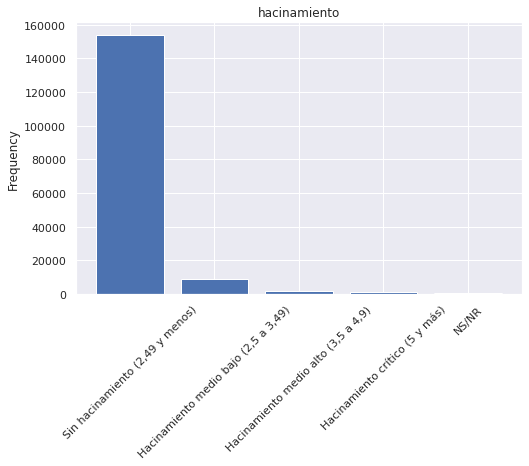

In [ ]:
#Graficando principales variables categóricas.
categoricas = ['cat_pobreza', 'sexo', 'o1', 'activ','indsan','indmat','calglobviv','hacinamiento']
for c in categoricas:
    bar_plot(c)

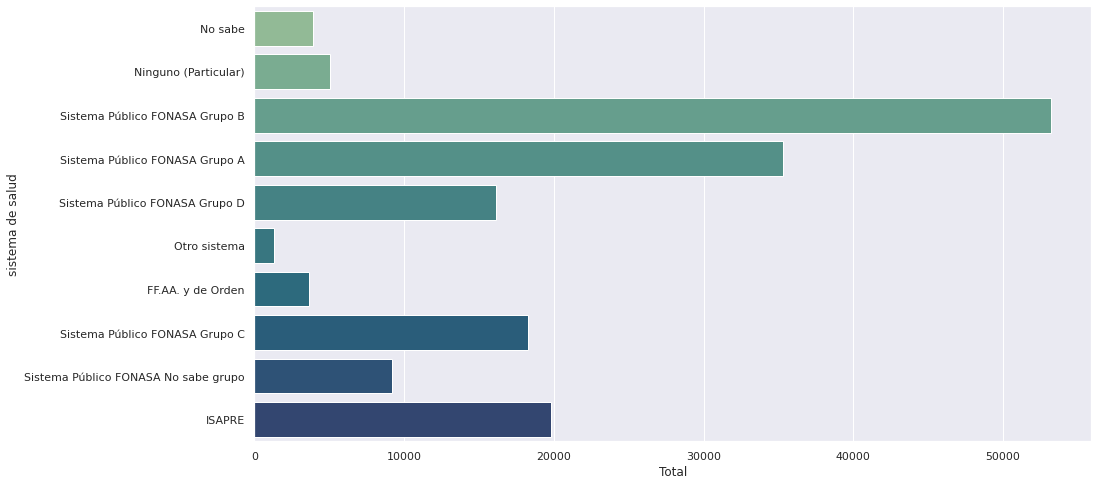

In [ ]:
#Gráfico de barra vertical de los sistemas de salud registrados.
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.countplot(y="s12", data=data_3, palette="crest")
plt.ylabel('sistema de salud')
plt.xlabel('Total')
plt.show()

+ **Análisis bivariado**

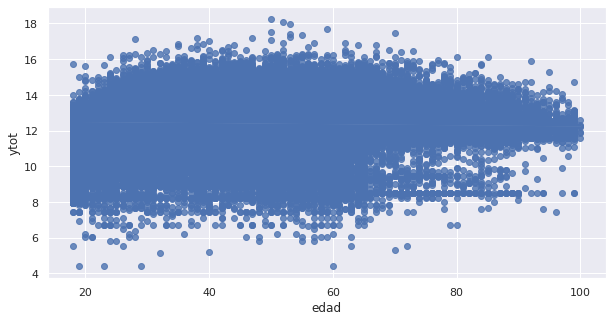

In [ ]:
#Distribución de los ingresos, en escala logarítmica, por edad.
plt.figure(figsize=(10,5))
sns.regplot(y= np.log(data_3['ytot']), x=data_3['edad'])

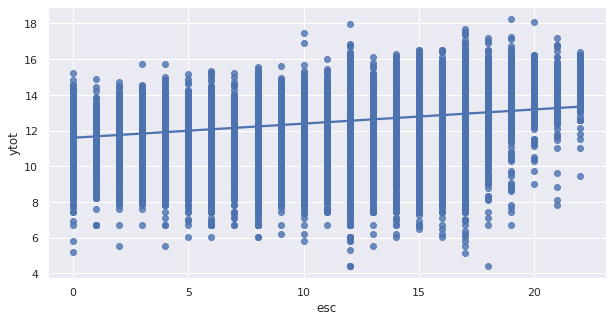

In [ ]:
#Distribución de los ingresos, en escala logarítmica, por años de escolaridad.
plt.figure(figsize=(10,5))
sns.regplot(y= np.log(data_3['ytot']), x=data_3['esc'])

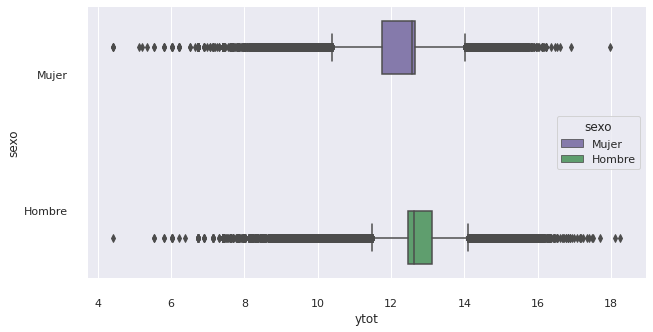

In [ ]:
#Distribución de los ingresos, en escala logarítmica, por sexo.
plt.figure(figsize=(10,5))
sns.boxplot(x=np.log(data_3["ytot"]), y="sexo",
            hue="sexo", palette=["m", "g"],
            data=data_3)
sns.despine(offset=10, trim=True)

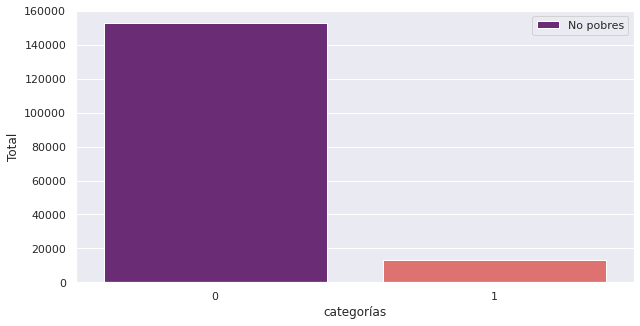

In [ ]:
#Cantidad de no pobrezx y pobres total
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.countplot(x="cat_pobreza", data=data_3, palette="magma")
plt.xlabel('categorías')
plt.ylabel('Total')
plt.legend(['No pobres', 'pobres'])
plt.show()

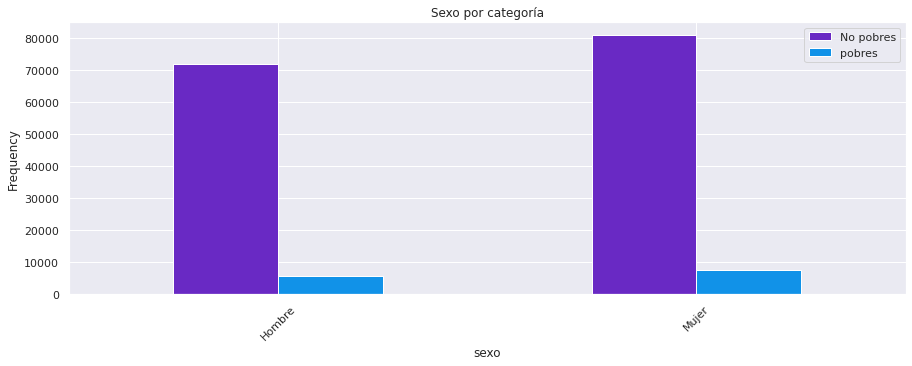

In [ ]:
#Tablas cruzadas entre aexo por categoría
pd.crosstab(data_3.sexo,data_3.cat_pobreza).plot(kind="bar",figsize=(15,5),color=['#6929c4','#1192e8'])
plt.title('Sexo por categoría')
plt.xlabel('sexo')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.legend(['No pobres', 'pobres'])
plt.show()

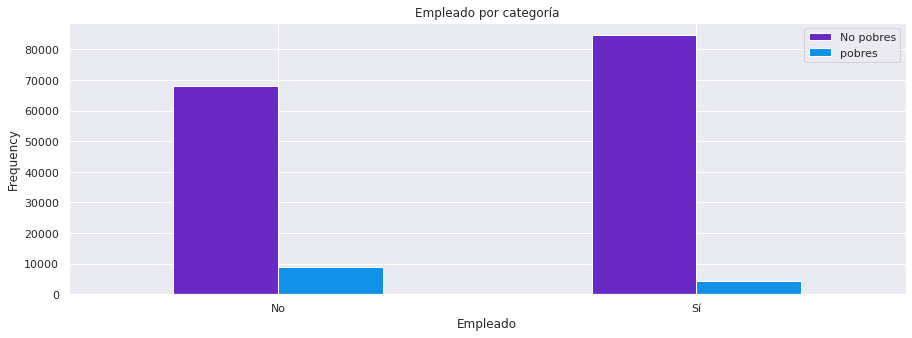

In [ ]:
#Tablas cruzadas entre sexo por categoría.
pd.crosstab(data_3.o1,data_3.cat_pobreza).plot(kind="bar",figsize=(15,5),color=['#6929c4','#1192e8'])
plt.title('Empleado por categoría')
plt.xlabel('Empleado')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(['No pobres', 'pobres'])
plt.show()

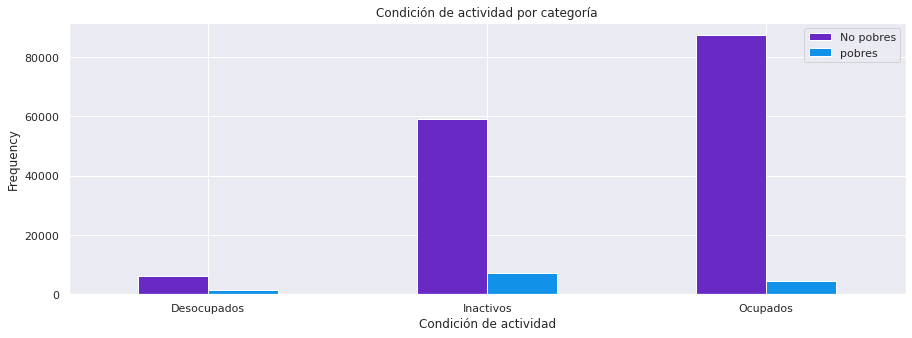

In [ ]:
#Tablas cruzadas entre actividad por categoría.
pd.crosstab(data_3.activ,data_3.cat_pobreza).plot(kind="bar",figsize=(15,5),color=['#6929c4','#1192e8'])
plt.title('Condición de actividad por categoría')
plt.xlabel('Condición de actividad')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(['No pobres', 'pobres'])
plt.show()

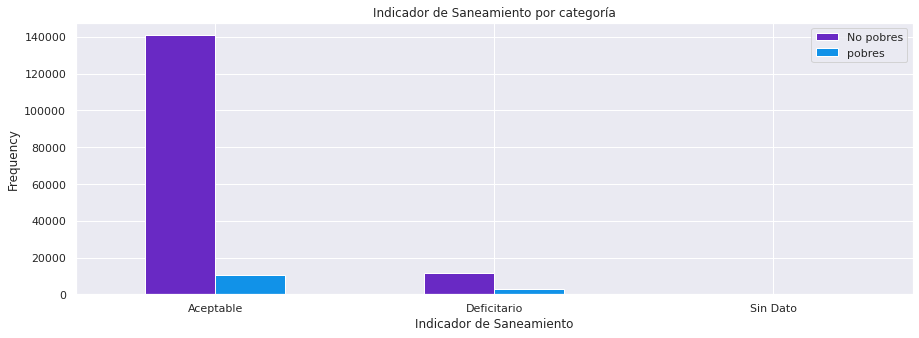

In [ ]:
#Tablas cruzadas entre indicador de Saneamiento por categoría.
pd.crosstab(data_3.indsan,data_3.cat_pobreza).plot(kind="bar",figsize=(15,5),color=['#6929c4','#1192e8'])
plt.title('Indicador de Saneamiento por categoría')
plt.xlabel('Indicador de Saneamiento')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(['No pobres', 'pobres'])
plt.show()

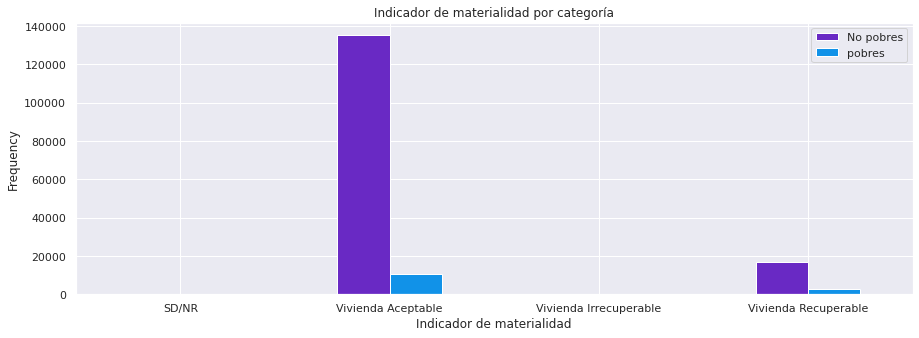

In [ ]:
#Tablas cruzadas entre Indicador de materialidad por categoría.
pd.crosstab(data_3.indmat,data_3.cat_pobreza).plot(kind="bar",figsize=(15,5),color=['#6929c4','#1192e8'])
plt.title('Indicador de materialidad por categoría')
plt.xlabel('Indicador de materialidad')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(['No pobres', 'pobres'])
plt.show()

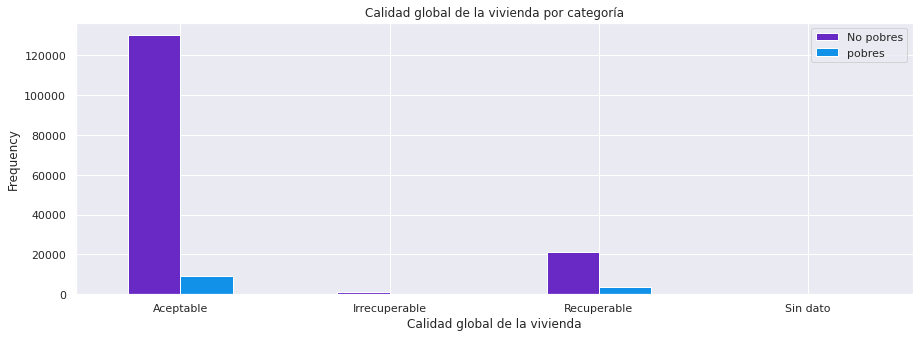

In [ ]:
#Tablas cruzadas entre Calidad global de la vivienda por categoría.
pd.crosstab(data_3.calglobviv,data_3.cat_pobreza).plot(kind="bar",figsize=(15,5),color=['#6929c4','#1192e8'])
plt.title('Calidad global de la vivienda por categoría')
plt.xlabel('Calidad global de la vivienda')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(['No pobres', 'pobres'])
plt.show()

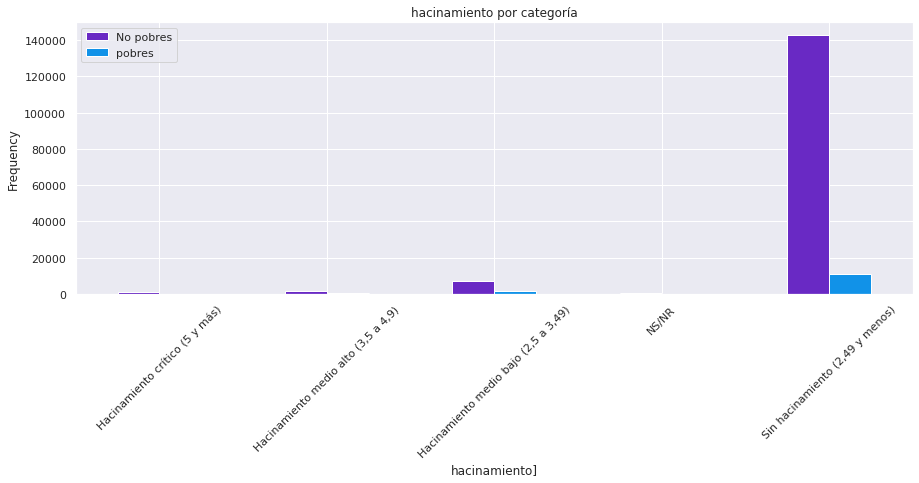

In [ ]:
#Tablas cruzadas entre hacinamiento] por categoría.
pd.crosstab(data_3.hacinamiento,data_3.cat_pobreza).plot(kind="bar",figsize=(15,5),color=['#6929c4','#1192e8'])
plt.title('hacinamiento por categoría')
plt.xlabel('hacinamiento]')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.legend(['No pobres', 'pobres'])
plt.show()

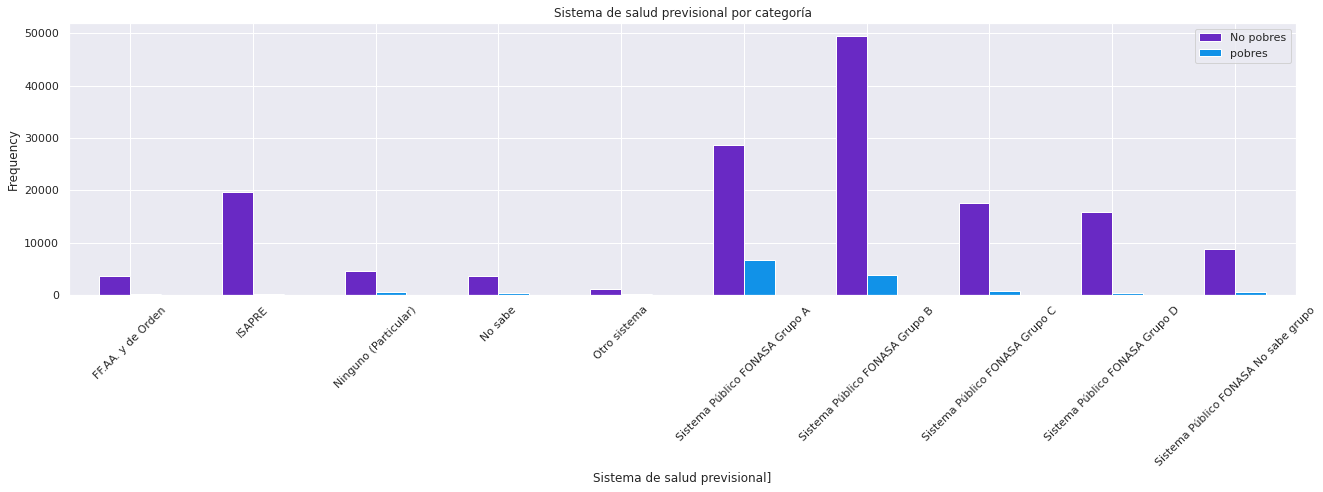

In [ ]:
#Tablas cruzadas entre hacinamiento] por categoría.
pd.crosstab(data_3.s12,data_3.cat_pobreza).plot(kind="bar",figsize=(22,5),color=['#6929c4','#1192e8'])
plt.title('Sistema de salud previsional por categoría')
plt.xlabel('Sistema de salud previsional]')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.legend(['No pobres', 'pobres'])
plt.show()

## **Corto la data en 'entrenamiento' y 'test'** ##

In [ ]:
y = data_3['cat_pobreza']
X = data_3.drop('cat_pobreza', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2 )

In [ ]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((132697, 11), (132697,), (33175, 11), (33175,))

In [ ]:
X_train.head()

,sexo,edad,o1,s12,ytot,esc,activ,indmat,indsan,calglobviv,hacinamiento
141757,Hombre,78,No,Sistema Público FONASA Grupo B,138500.0,12.0,Inactivos,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
156656,Mujer,34,Sí,ISAPRE,290000.0,12.0,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
33250,Mujer,55,Sí,Sistema Público FONASA Grupo B,267000.0,12.0,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
125643,Mujer,48,Sí,Sistema Público FONASA Grupo B,18459.0,10.0,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"
109598,Hombre,70,Sí,Sistema Público FONASA Grupo A,184997.0,3.0,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"


+ Genero varibles dummies y elimino categorías que se repitan o que indiquen sin respuesta/no sabe.

In [ ]:
X_train = pd.get_dummies(X_train)
X_train.drop('sexo_Mujer', axis=1, inplace=True)
X_train.drop('o1_Sí', axis=1, inplace=True)
X_train.drop('indsan_Deficitario', axis=1, inplace=True)
X_train.drop('activ_Desocupados', axis=1, inplace=True)
X_train.drop('calglobviv_Sin dato', axis=1, inplace=True)
X_train.drop('indsan_Sin Dato', axis=1, inplace=True)
X_train.drop('indmat_SD/NR', axis=1, inplace=True)
X_train.drop('hacinamiento_NS/NR', axis=1, inplace=True)
X_test = pd.get_dummies(X_test)
X_test.drop('sexo_Mujer', axis=1, inplace=True)
X_test.drop('o1_Sí', axis=1, inplace=True)
X_test.drop('indsan_Deficitario', axis=1, inplace=True)
X_test.drop('activ_Desocupados', axis=1, inplace=True)
X_test.drop('calglobviv_Sin dato', axis=1, inplace=True)
X_test.drop('indsan_Sin Dato', axis=1, inplace=True)
X_test.drop('indmat_SD/NR', axis=1, inplace=True)
X_test.drop('hacinamiento_NS/NR', axis=1, inplace=True)


In [ ]:
X_train.head()

,edad,ytot,esc,sexo_Hombre,o1_No,s12_FF.AA. y de Orden,s12_ISAPRE,s12_Ninguno (Particular),s12_No sabe,s12_Otro sistema,...,indmat_Vivienda Irrecuperable,indmat_Vivienda Recuperable,indsan_Aceptable,calglobviv_Aceptable,calglobviv_Irrecuperable,calglobviv_Recuperable,hacinamiento_Hacinamiento crítico (5 y más),"hacinamiento_Hacinamiento medio alto (3,5 a 4,9)","hacinamiento_Hacinamiento medio bajo (2,5 a 3,49)","hacinamiento_Sin hacinamiento (2,49 y menos)"
141757,78,138500.0,12.0,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
156656,34,290000.0,12.0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
33250,55,267000.0,12.0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
125643,48,18459.0,10.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
109598,70,184997.0,3.0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


+ Debido a la amplia diferencia entre las categorías 'no pobres' y 'pobres', pruebo estratégia de balanceo de datos que entregue mejores resultados y comparo.

## **Regresión logística** ##

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     30526
           1       0.00      0.00      0.00      2649

    accuracy                           0.92     33175
   macro avg       0.46      0.50      0.48     33175
weighted avg       0.85      0.92      0.88     33175

Accuracy en el set de Entrenamiento: 0.92
Accuracy en el set de Test: 0.92
Recall en el set de Test: 0.00


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


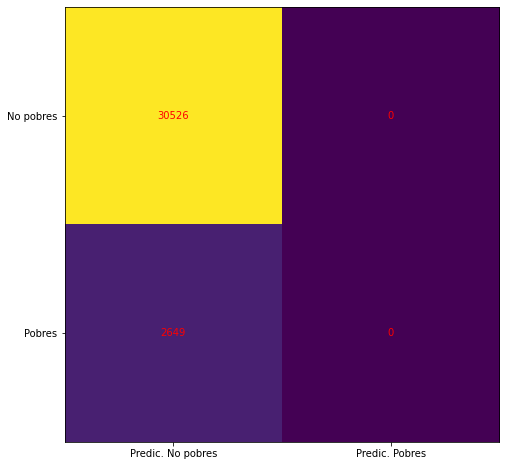

In [ ]:
#Regresión logística sin aplicar estrategia de balanceo.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy en el set de Entrenamiento: {:.2f}'
     .format(logistic_regression.score(X_train, y_train)))
print('Accuracy en el set de Test: {:.2f}'
     .format(logistic_regression.score(X_test, y_test)))
print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No pobres', 'Predic. Pobres'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No pobres', 'Pobres'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ El desbalance se evidencia con el alto valor de 'precisión' de la clase mayoritaria (no pobres) y el valor cero de 'recall' en la clase minoritaria (pobres), la cual es la de interés para el modelo de clasificación. No se considerará el indicador accuracy al no funcionar bien en clases desbalanceadas.
+ Se observará que pasa con estratégias de balanceo.

+ **SMOTE**

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_smote).items()))

[(0, 122127), (1, 122127)]


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     30526
           1       0.00      0.00      0.00      2649

    accuracy                           0.92     33175
   macro avg       0.46      0.50      0.48     33175
weighted avg       0.85      0.92      0.88     33175

Recall en el set de Test: 0.00


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


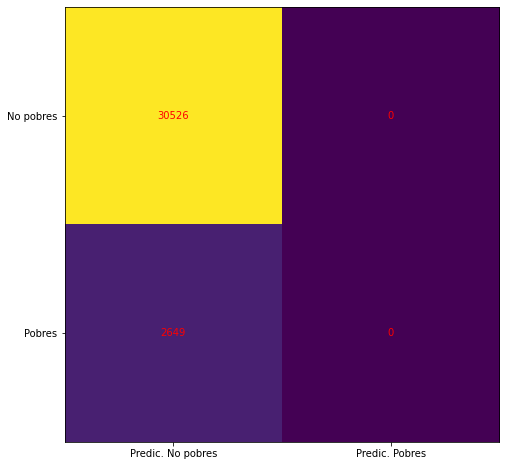

In [ ]:
logistic_regression.fit(X_train_smote,y_train_smote)
y_pred=logistic_regression.predict(X_test)

print(classification_report(y_test, y_pred))
print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No pobres', 'Predic. Pobres'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No pobres', 'Pobres'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ **Under Sampler**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_rus).items()))

[(0, 10570), (1, 10570)]


              precision    recall  f1-score   support

           0       0.94      0.72      0.82     30526
           1       0.13      0.48      0.20      2649

    accuracy                           0.70     33175
   macro avg       0.54      0.60      0.51     33175
weighted avg       0.88      0.70      0.77     33175

[[21985  8541]
 [ 1372  1277]]
Recall en el set de Test: 0.48


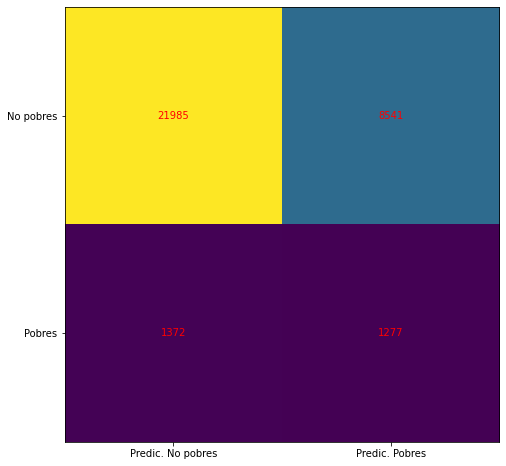

In [ ]:
#Regresión logística con Under Sampler
logistic_regression.fit(X_train_rus,y_train_rus)
y_pred=logistic_regression.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No pobres', 'Predic. Pobres'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No pobres', 'Pobres'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ **Cross validation**

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

cross_val_score(logistic_regression, X_train_rus, y_train_rus, cv=10, scoring='recall')


array([0.4910123 , 0.4910123 , 0.        , 0.        , 0.        ,
       0.47965941, 0.49763482, 0.47209082, 0.        , 0.        ])

Recall observado y el obtenido con cross validation

+ **Over Sampler**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=2)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_ros).items()))

[(0, 122127), (1, 122127)]


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     30526
           1       0.00      0.00      0.00      2649

    accuracy                           0.92     33175
   macro avg       0.46      0.50      0.48     33175
weighted avg       0.85      0.92      0.88     33175

[[30526     0]
 [ 2649     0]]
Recall en el set de Test: 0.00


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


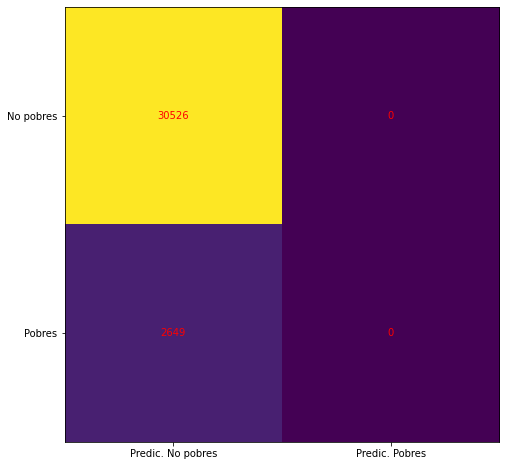

In [ ]:
logistic_regression.fit(X_train_ros,y_train_ros)
y_pred=logistic_regression.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No pobres', 'Predic. Pobres'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No pobres', 'Pobres'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## **Naives Bayes** ##



              precision    recall  f1-score   support

           0       1.00      0.27      0.43     30526
           1       0.11      0.99      0.19      2649

    accuracy                           0.33     33175
   macro avg       0.55      0.63      0.31     33175
weighted avg       0.93      0.33      0.41     33175

[[ 8325 22201]
 [   21  2628]]
Recall en el set de Test: 0.99


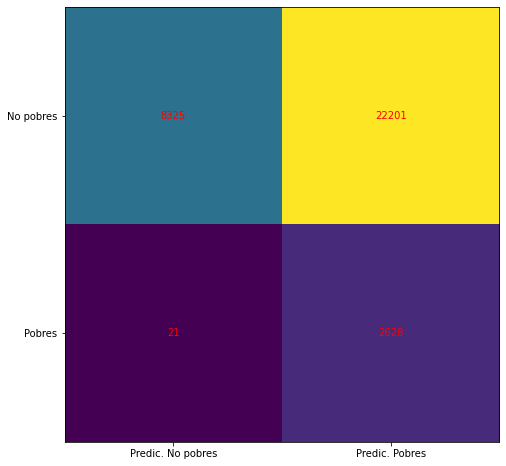

In [ ]:
#Naives Bayes con balanceo Over Sampler

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_ros,y_train_ros)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No pobres', 'Predic. Pobres'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No pobres', 'Pobres'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ Cross validation Naives bayes con over sampling

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

cross_val_score(gnb, X_train_ros, y_train_ros, cv=10, scoring='recall')

array([0.99451404, 0.99484156, 0.99328584, 0.99418652, 0.99410416,
       0.99459548, 0.99451359, 0.99418652, 0.99435028, 0.99443216])

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gnb, X_train_ros, y_train_ros, cv=3)
recall_score(y_train_ros, y_train_pred)

0.994382896492995

              precision    recall  f1-score   support

           0       1.00      0.28      0.44     30526
           1       0.11      0.99      0.19      2649

    accuracy                           0.34     33175
   macro avg       0.55      0.63      0.31     33175
weighted avg       0.93      0.34      0.42     33175

[[ 8506 22020]
 [   24  2625]]
Recall en el set de Test: 0.99


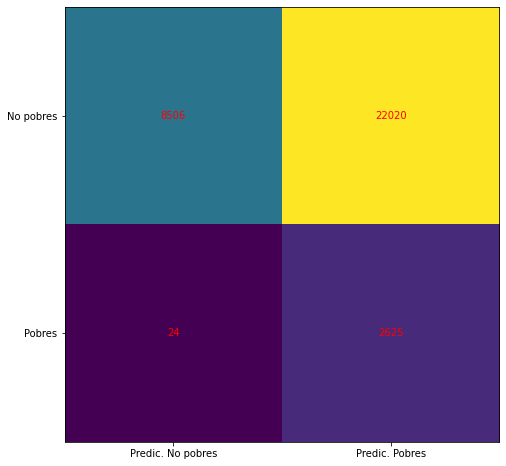

In [ ]:
#Naives Bayes con balanceo Under Sampler

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_rus,y_train_rus)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No pobres', 'Predic. Pobres'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No pobres', 'Pobres'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.27      0.43     30526
           1       0.11      0.99      0.19      2649

    accuracy                           0.33     33175
   macro avg       0.55      0.63      0.31     33175
weighted avg       0.93      0.33      0.41     33175

[[ 8305 22221]
 [   20  2629]]
Recall en el set de Test: 0.99


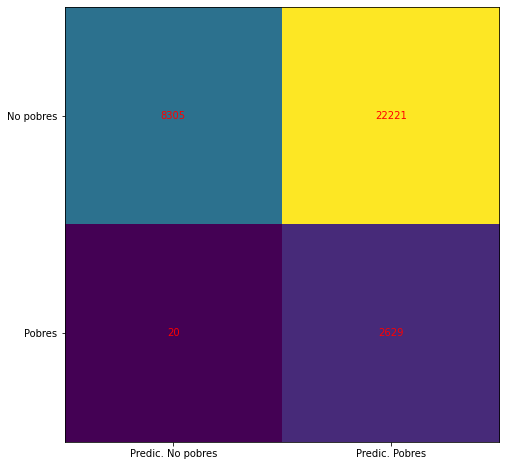

In [ ]:
#Naives Bayes con balanceo Smote

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_smote,y_train_smote)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No pobres', 'Predic. Pobres'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No pobres', 'Pobres'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ Cross validation Naives Bayes con smote

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
cross_val_score(gnb, X_train_smote, y_train_smote, cv=10, scoring='recall')

array([0.9946778 , 0.99459592, 0.995906  , 0.99492344, 0.99377661,
       0.99574189, 0.99418605, 0.99475968, 0.99492344, 0.99557848])

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gnb, X_train_smote, y_train_smote, cv=3)
recall_score(y_train_ros, y_train_pred)

0.9949478821227083

* El modelo con Naives Bayes obtiene una alta capacidad de clasificar a los verdaderos positivos clase 2, pero posee una presición muy baja lo cual indica que se clasifican una gran cantidad de 'no pobres' como 'pobres', es decir falsos positivos. El f1-score estuvo muy bajo en los tres modelos con balanceos diferentes con un valor de 19%.

## **Decision Tree Classifier** ##

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     30526
           1       0.19      0.27      0.22      2649

    accuracy                           0.85     33175
   macro avg       0.56      0.59      0.57     33175
weighted avg       0.87      0.85      0.86     33175

[[27512  3014]
 [ 1937   712]]
Recall en el set de Test: 0.27


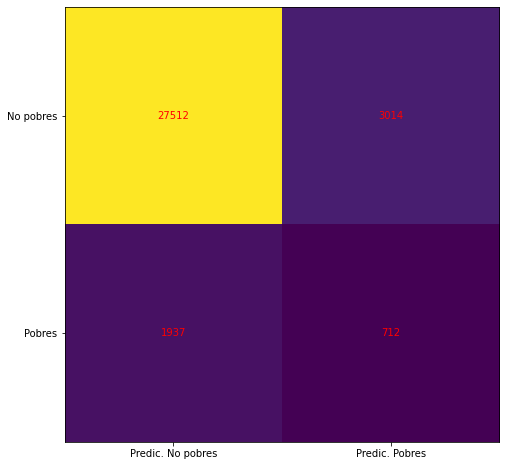

In [ ]:
#Árbol de decisiones con balanceo Smote

from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(random_state=1).fit(X_train_smote,y_train_smote)
y_pred = tree_class.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No pobres', 'Predic. Pobres'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No pobres', 'Pobres'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

cross_val_score(tree_class, X_train, y_train, cv=3, scoring='recall')

from sklearn.metrics import recall_score

y_train_pred = cross_val_predict(tree_class, X_train, y_train, cv=3)
recall_score(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     30526
           1       0.15      0.66      0.25      2649

    accuracy                           0.68     33175
   macro avg       0.56      0.67      0.52     33175
weighted avg       0.89      0.68      0.75     33175

[[20840  9686]
 [  894  1755]]
Recall en el set de Test: 0.66


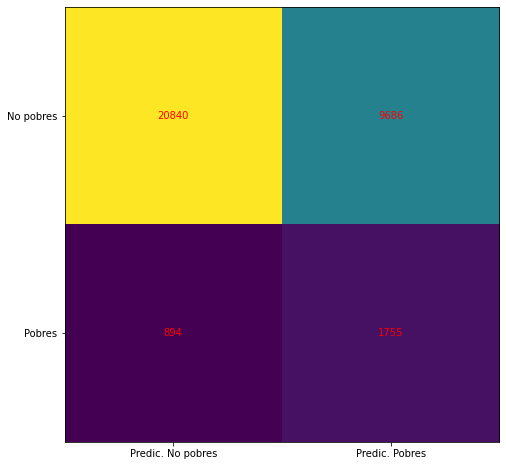

In [ ]:
#Árbol de decisiones con balanceo Under sampling

from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(random_state=1).fit(X_train_rus,y_train_rus)
y_pred = tree_class.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No pobres', 'Predic. Pobres'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No pobres', 'Pobres'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ Cross validation Decision Tree con balanceo Under sampling

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

cross_val_score(tree_class, X_train_rus, y_train_rus, cv=10, scoring='recall')

array([0.66225166, 0.69441816, 0.63859981, 0.66982025, 0.64900662,
       0.67076632, 0.65657521, 0.67171239, 0.63292337, 0.63859981])

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(tree_class, X_train_rus, y_train_rus, cv=3)
recall_score(y_train_rus, y_train_pred)

0.6579943235572374

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     30526
           1       0.18      0.27      0.21      2649

    accuracy                           0.84     33175
   macro avg       0.56      0.58      0.56     33175
weighted avg       0.87      0.84      0.86     33175

[[27243  3283]
 [ 1940   709]]
Recall en el set de Test: 0.27


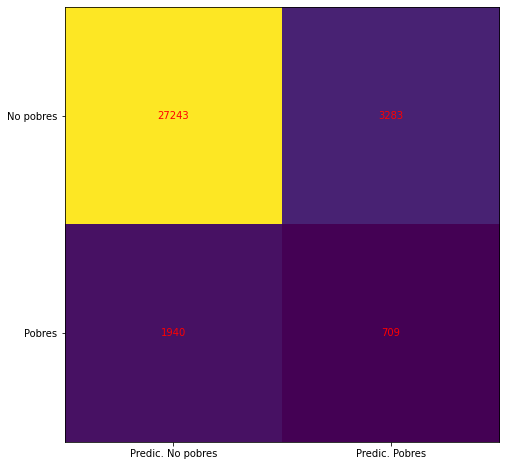

In [ ]:
#Árbol de decisiones con balanceo Over Sampling

from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(random_state=1).fit(X_train_ros,y_train_ros)
y_pred = tree_class.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Recall en el set de Test: {:.2f}'
     .format(recall_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predic. No pobres', 'Predic. Pobres'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No pobres', 'Pobres'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

+ Con desicion tree, el mejor modelo predictivo de la clase 2 de verdaderos positivos, es decir pobres corretamente predicho como tales, se da con la estrategia Under sampling de balanceo. Da un recall de 66% y f1-score de 25%.

## Conclusiones ##

De los modelos analizados se extrae que hay grandes variaciones al momento de clasificar a los encuestados como 'pobres' cuando realmente lo son. En regresión logística se obtuvo un 48% de recall con al menos 8541 casos falsos positivos(no pobres clasificados como pobres). En Naives Bayes se obtuvo un alto recall con 99% pero una gran cantidad de falsos positivos, si se tratara sólo de clasificar a os pobres el modelo funcionaria mejor que la regresión logpistica. Con decision tree, con balanceo tipo Under Sampling, se obtuvo un recall de 66% y un nivel de falsos positivos menor que en Naives Bayes, pero en general una leve capacidad de clasificar de manera correcta a los casos de pobres. Se podría considerar mejorar la base de datos u optar por decision tree en caso de que sea importante considerar un valor no tan alto de falsos positivos, es decir, es el modelo más balanceado en este nivel de análisis.